In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
def plot_visibility_scatter(csvfile='/Users/iuliarusu/Documents/museum/drop_model_movement/walkable_positions_with_visibility.csv'):
    """
    Plot visibility data as scatter plot and pcolor surface.
    
    Parameters:
    csvfile (str): Path to CSV file with visibility data
    """
    
    data = pd.read_csv(csvfile)
    
    x = data.iloc[:, 1].values  
    y = data.iloc[:, 2].values  
    c = data.iloc[:, 3].values  
    
    plt.figure(5, figsize=(10, 8))
    plt.clf()
    
    plt.subplot(2, 1, 1)
    scatter = plt.scatter(x, y, s=20, c=c, cmap='turbo', edgecolors='none')
    plt.colorbar(scatter)
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Visibility scatter plot')
    
    ax1 = plt.gca()
    ax1.set_facecolor((0.8, 0.8, 0.8))
    ax1.grid(True)
    ax1.set_axisbelow(False) 
    
    plt.clim(c.min(), c.max())
    
    plt.subplot(2, 1, 2)
    
    ux = np.unique(x)
    uy = np.unique(y)
    
    Xg, Yg = np.meshgrid(ux, uy)
    
    ix = np.searchsorted(ux, x)
    iy = np.searchsorted(uy, y)
    
    Z = np.full((len(uy), len(ux)), np.nan)
    
    for i in range(len(uy)):
        for j in range(len(ux)):
            mask = (iy == i) & (ix == j)
            if np.any(mask):
                Z[i, j] = np.mean(c[mask])
    
    mesh = plt.pcolormesh(Xg, Yg, Z, cmap='turbo', shading='nearest')
    plt.colorbar(mesh)
    
    ax2 = plt.gca()
    ax2.set_facecolor((0.92, 0.92, 0.92))
    ax2.grid(True)
    ax2.set_axisbelow(False)  
    
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Visibility pcolor plot')
    plt.axis([0, 20, 1, 10])
    
    plt.tight_layout()
    plt.show()


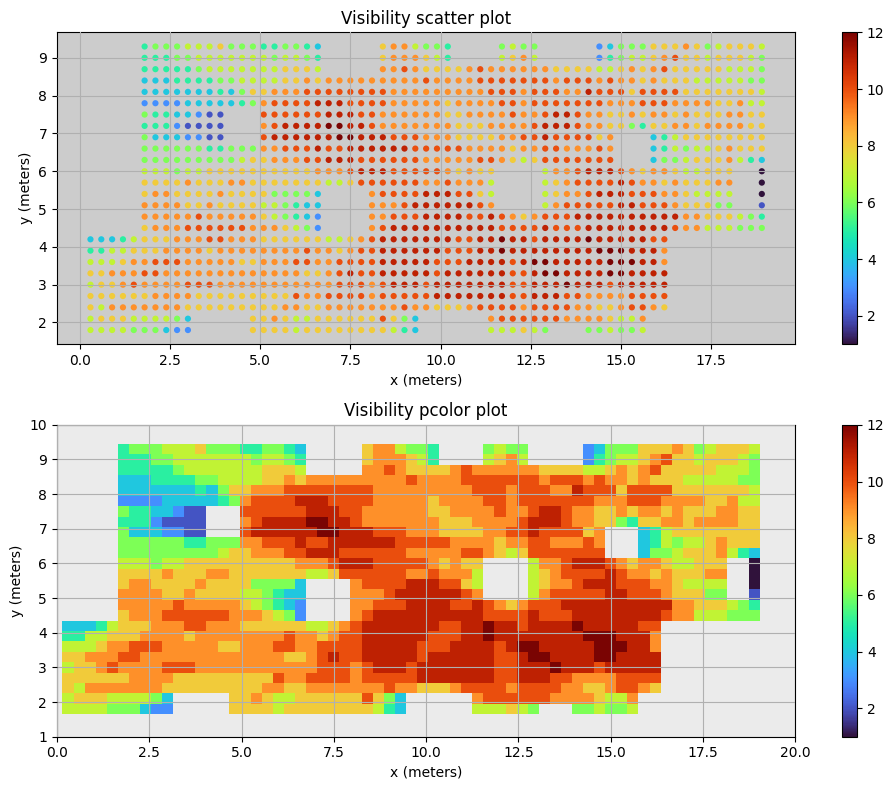

In [3]:
plot_visibility_scatter('/Users/iuliarusu/Documents/museum/drop_model_movement/walkable_positions_with_visibility.csv')